# Part I - (Loan Data from Prosper - Exploration)
## by (Michèle Nkuimi)

## Introduction
> Loan Data from Prosper is a data set that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading in our dataset
dataset = pd.read_csv('C:\\Users\\michèle_nkuimi\\Downloads\\project5-db\\prosperLoanData.csv')

In [3]:
print(dataset.shape)

(113937, 81)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
dataset.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
# descriptive statistics for numeric variables
#print(dataset.describe())
dataset.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
minvalue = dataset['ListingCreationDate'].min()
minvalue 

'2005-11-09 20:44:28.847000000'

In [8]:
maxvalue = dataset['ListingCreationDate'].max()
maxvalue 

'2014-03-10 12:20:53.760000000'

### What is the structure of our dataset?

> The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income ECT...
We note that most variables are numeric; the variable Loan status(The current status of the loan) is a factor variable with the following values: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. 
> The dataset contains loans created between 2005 and 2014.

### What is/are the main feature(s) of interest in our dataset?

> I'm mostly interested in features such as ProsperScore, AvailableBankcardCredit, BorrowerRate, LoanOriginalAmount, and StatedMonthlyIncome because I believe these features can affect the loan process.


### What features in the dataset do I think will help support our investigation into our feature(s) of interest?

> I expect that the variables such as LoanStatus, TotalCreditLinespast7years, EmploymentStatus and DelinquenciesLast7Years would definetely influence a loan process and thus help me support my investigation.

## Univariate Exploration


I'll start by looking at variables that can answer the questions: how does a loan(Prosper loan in this case) work? and who can get a Prosper loans? 
I guess, bank or lenders do not want to run a risk of loosing their money and they also would like to have some profit out a loan. So they check the borrower's credit score, history and income.

### 1. ProsperScore
> A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.


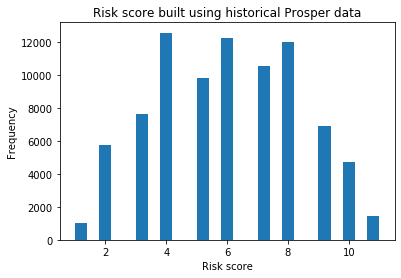

In [9]:
# Plotting a standard-scaled plot
dataset['ProsperScore'].plot.hist(bins=25)
plt.xlabel('Risk score')
plt.title('Risk score built using historical Prosper data');

The histogram above shows a multimodal distribution of ProsperScore. Which implies that there is more than one score that occurs most frequently.

### 2. TotalCreditLinespast7years

> Number of credit lines in the past seven years at the time the credit profile was pulled.

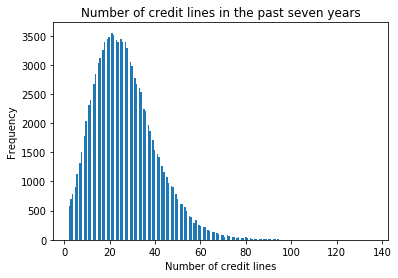

In [10]:
# Plotting a standard-scaled plot
dataset['TotalCreditLinespast7years'].plot.hist(bins=200)
plt.xlabel('Number of credit lines')
plt.title('Number of credit lines in the past seven years');

From the histogram above we can see that the distribution of TotalCreditLinespast7years is skewed to the right, meaning it has a positive distribution. 

### 3. DelinquenciesLast7Years

> Number of delinquencies in the past 7 years at the time the credit profile was pulled


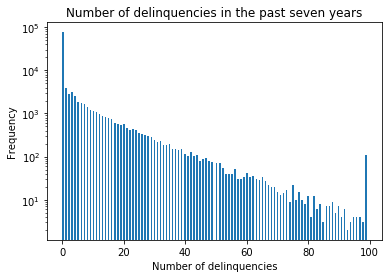

In [11]:
# Plotting a log-scaled plot 

#dataset['DelinquenciesLast7Years'].plot.hist(log=True)
dataset['DelinquenciesLast7Years'].plot.hist(bins=200, log=True)
plt.xlabel('Number of delinquencies')
plt.title('Number of delinquencies in the past seven years');

From the histogram above we can see that the distribution of DelinquenciesLast7Years has a slightly positive distribution: 
Majority of the borrowers have 0 current delinquencies.

### 4. StatedMonthlyIncome

> The monthly income the borrower stated at the time the listing was created.


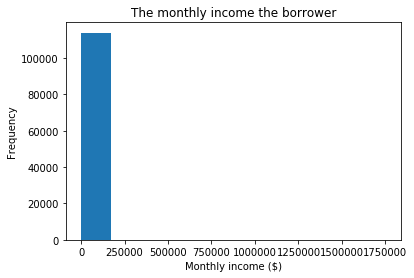

In [12]:
# Plotting a standard-scaled plot
dataset['StatedMonthlyIncome'].plot.hist()
plt.xlabel('Monthly income ($)')
plt.title('The monthly income the borrower');

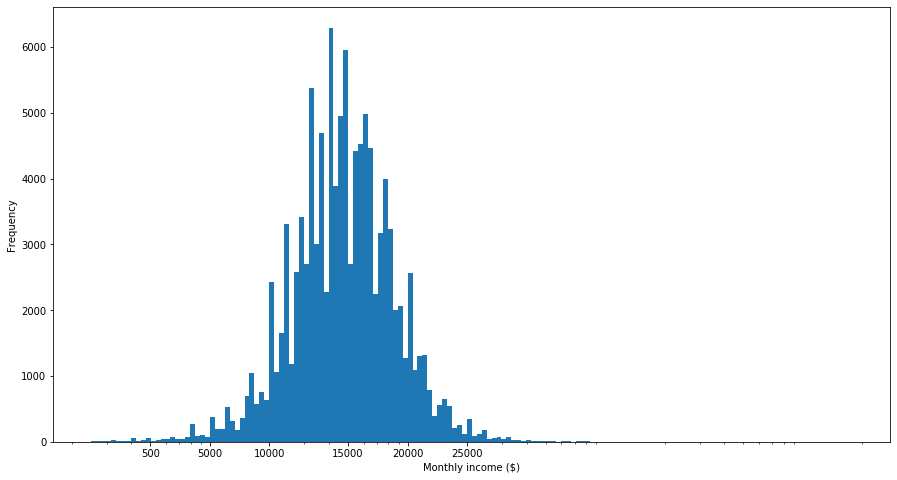

In [13]:
# Plotting a log scale instead
plt.figure(figsize=[15, 8])
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(dataset['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.hist(data = dataset, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '5000', '10000', '15000', '20000', '25000'])
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '5000', '30000', '75000', '150000', '200000'])
plt.xlabel('Monthly income ($)')
plt.ylabel('Frequency')
plt.show()

### 5. AvailableBankcardCredit	
> The total available credit via bank card at the time the credit profile was pulled.


In [14]:
maxvalue = dataset['AvailableBankcardCredit'].max()
maxvalue

646285.0

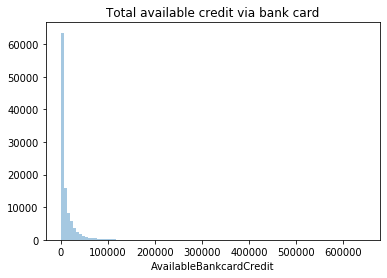

In [15]:
#Plotting a standard-scaled plot 
BCC=dataset['AvailableBankcardCredit'].dropna()
sb.distplot(BCC, bins=100,kde=False).set_title("Total available credit via bank card");

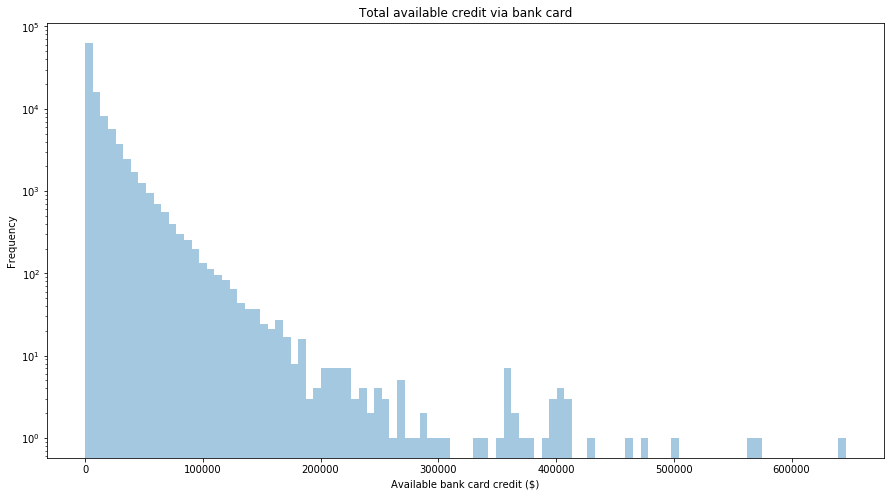

In [16]:
# Plotting a log-scaled plot instead
plt.figure(figsize=[15, 8])
BCC=dataset['AvailableBankcardCredit'].dropna()
ax=sb.distplot(BCC, bins=100,kde=False)
ax.set_title("Total available credit via bank card")
ax.set(xlabel='Available bank card credit ($)', ylabel='Frequency')
ax.set_yscale('log');

### 6.  BorrowerRate & BorrowerAPR
> BorrowerRate is the borrower's interest rate for this loan while a BorrowerAPR is the borrower's annual percentage rate (APR) for the loan.

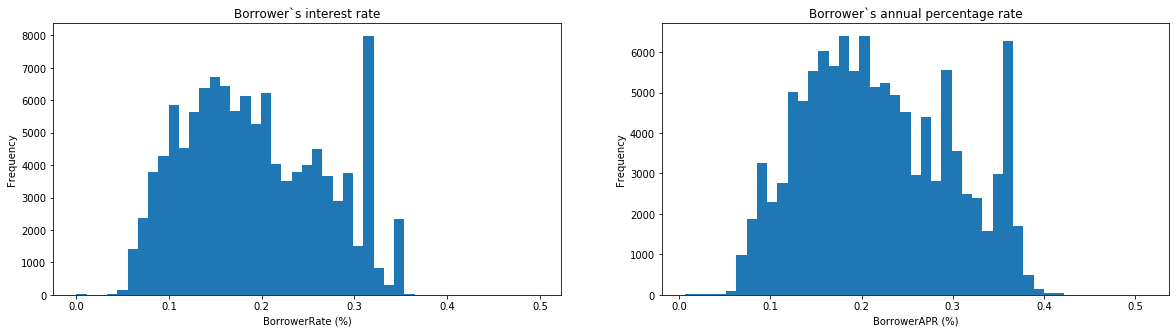

In [17]:
# Plotting standard-scaled plots
plt.figure(figsize = [20, 5]) 


# histogram on left, 
plt.subplot(1, 2, 1) 
dataset['BorrowerRate'].plot.hist(bins=45)
plt.xlabel('BorrowerRate (%)')
plt.title('Borrower`s interest rate');


# histogram on right, 
plt.subplot(1, 2, 2) 
dataset['BorrowerAPR'].plot.hist(bins=45)
plt.xlabel('BorrowerAPR (%)')
plt.title('Borrower`s annual percentage rate');

I wanted to visualise both variables(BorrowerRate and BorrowerAPR) side-by-side because I suppect a sort of ressemblance between. They look kind of similar to me; These graphs show multimodal distributions. The high bin( between 0.35 and 0.37) for example in de 'Borrower's interest rate' might indicate the presence of a very popular(maybe with lower cost and flexible terms?) interest rate.

### 7. EmploymentStatus
> The employment status of the borrower at the time they posted the listing.


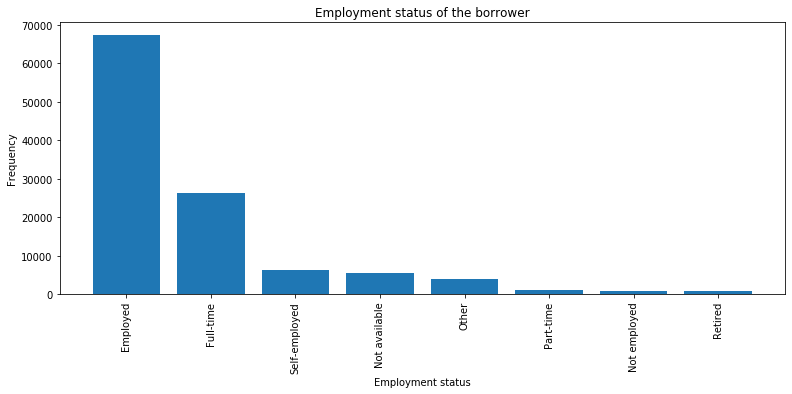

In [18]:
# Plotting a standard-scaled plot
plt.figure(figsize=(13,5))
def EmploymentStatus():
    categories = dataset['EmploymentStatus'].value_counts().index
    counts = dataset['EmploymentStatus'].value_counts().values
    plt.bar(categories, counts)
    plt.xlabel('Employment status')
    plt.ylabel('Frequency')
    plt.title("Employment status of the borrower")
    #plt.figure(figsize = (20,8));
    plt.xticks(rotation=90)
EmploymentStatus()

As seen from the graph above, most borrowers indicate to be employed and to be working full time.

### 8. LoanStatus

> The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.


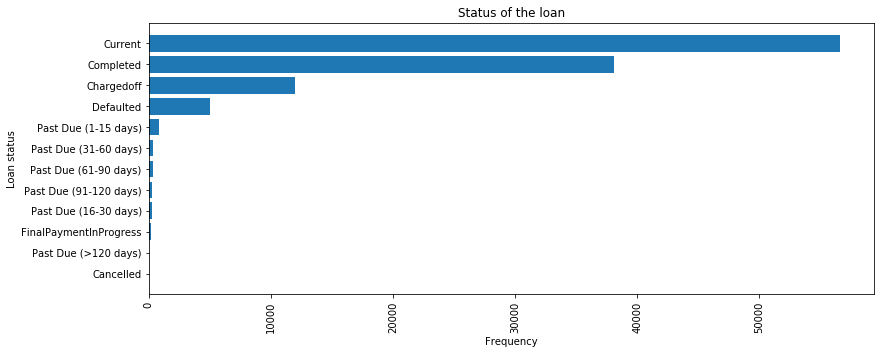

In [19]:
# Plotting a standard-scaled plot
plt.figure(figsize=(13,5))

def LoanStatus():
    categories = dataset['LoanStatus'].value_counts().sort_values().index
    counts = dataset['LoanStatus'].value_counts().sort_values().values
    plt.barh(categories, counts)
    plt.xlabel('Frequency')
    plt.ylabel('Loan status')
    plt.title("Status of the loan")
    plt.xticks(rotation=90) 
LoanStatus()

When I look at the frequencies of loan status in the graph above, the majority of loans in the dataset are either completed or currently being paid back.

### 9. LoanOriginalAmount

> The origination amount of the loan.


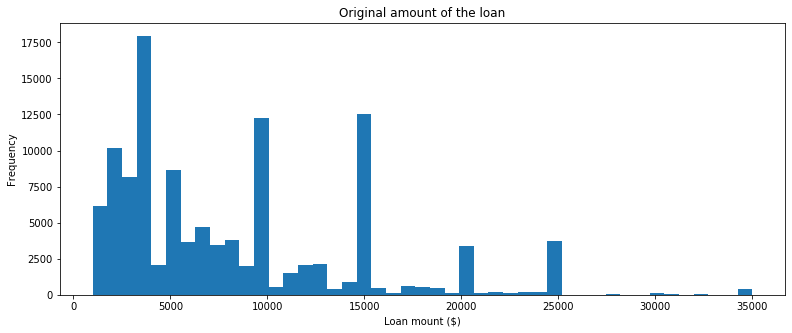

In [20]:
# Plotting a standard-scaled plot

#gglot(x = LoanOriginalAmount, data = dataset,
     # binwidth = 1000, colour = I("#424242"), fill = I("#0077C0")) 
#+  scale_x_continuous(breaks = seq(0, 35000, 5000))
plt.figure(figsize=(13,5))
dataset['LoanOriginalAmount'].plot.hist(bins=45)
plt.xlabel('Loan mount ($)')
plt.title('Original amount of the loan');

In [21]:
minvalue = dataset['LoanOriginalAmount'].min()
minvalue 

1000


> With this exploration phase, I have uncovered insights and identify areas or patterns to dig into more later on. 
I definitely got a bigger picture of the data and its features and now know how to approach the explanatory analysis.

> For some graphs, I have to play a little with bin sizes to make small changes visible or I used a log scale for other graphs  like "Total available credit via bank card". 

> All along the analysis, I observed unusual and highly skewed distributions for example DelinquenciesLast7Years, TotalCreditLinespast7years. This may be explained by the fact that most loans in the dataset have either no data recorded or 0 as value.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in our data. 

### 1. Correlation Matrix 

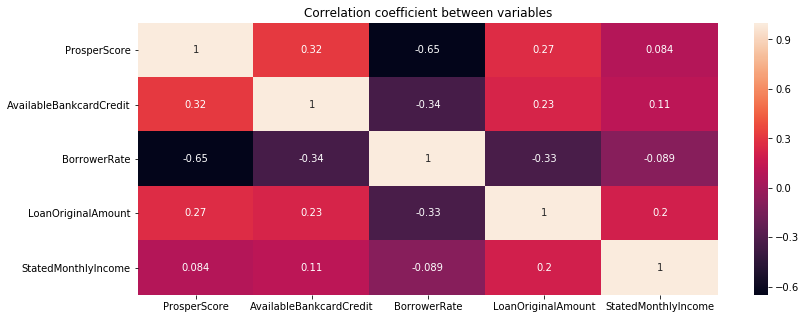

In [22]:
plt.figure(figsize=(13,5))
dataset1 = pd.DataFrame(dataset,columns=['ProsperScore', 'AvailableBankcardCredit', 'BorrowerRate','LoanOriginalAmount', 'StatedMonthlyIncome'])
corrMatrix = dataset1.corr()
sb.heatmap(corrMatrix, annot=True)
plt.title('Correlation coefficient between variables');


Surprisingly, the variables I believe to be strongly positively correlated are not, as seen from the graph above. The only moderate, although negative correlation is between ProsperScore and BorrowerRate.

### 2. DelinquenciesLast7Years vs AmountDelinquent
> Dollars delinquent at the time the credit profile was pulled.


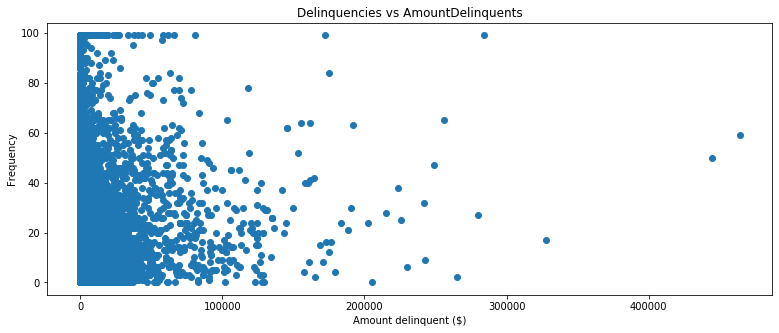

In [23]:
# Plotting a standard-scaled plot

plt.figure(figsize=(13,5))
#plt.scatter(data = dataset, y ='AmountDelinquent', x = 'DelinquenciesLast7Years'); 
plt.scatter(data = dataset, x ='AmountDelinquent', y = 'DelinquenciesLast7Years')
plt.xlabel('Amount delinquent ($)')
plt.ylabel('Frequency')
plt.title('Delinquencies vs AmountDelinquents');

The above graph is not really clear. If a borrower has delinquencies records what is then the 'AmountDelinquent'? that is what I was hoping to see. Unfortunately, the data has too many values. Making a log transformation was not a success.

### 3. EmploymentStatus vs StatedMonthlyIncome

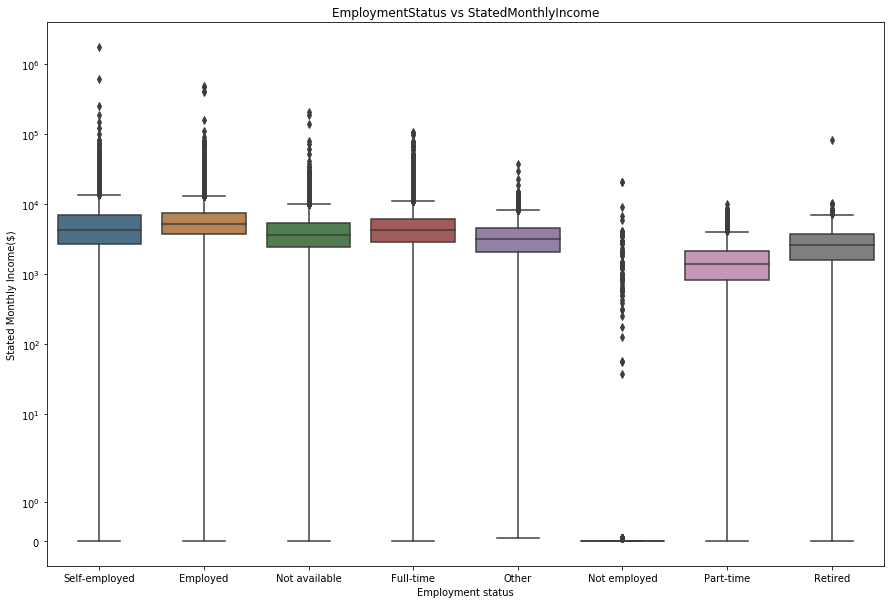

In [24]:
# Plotting a standard-scaled plot

plt.figure(figsize=(15,10))
sb.boxplot(data=dataset, y='StatedMonthlyIncome', x='EmploymentStatus', saturation=0.4)
plt.yscale('symlog')
plt.ylabel('Stated Monthly Income($)')
plt.xlabel('Employment status')
plt.title('EmploymentStatus vs StatedMonthlyIncome');

From  a boxplot, the length of the box is measure of dispersion of the sample. In the graph above, the boxes are quite short, which indicates that Stated monthly income of sample data is somehow centered.  Obviously without a job, one's income is very closed to Nihil; this explaines why the sample population of 'Not employed' has no box/whisker.

### 4. BorrowerRate vs ListingCreationDate

In [25]:
# Formating the data

dataset['ListingCreationDate'] = pd.to_datetime(dataset.ListingCreationDate, format='%Y-%m-%d %H:%M:%S')
#dataset['Quarter'] = dataset['ListingCreationDate'].dt.to_period('Q')
dataset['Year'] = dataset['ListingCreationDate'].dt.year

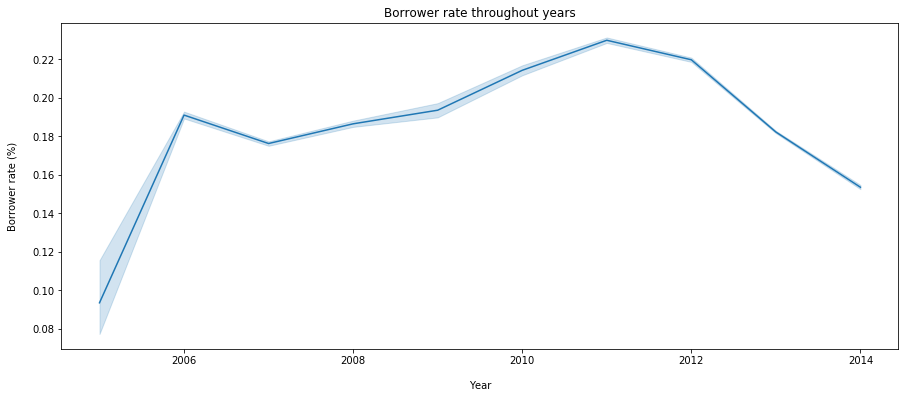

In [26]:
# Plotting a standard-scaled plot

plt.figure(figsize=(15,6))
#yd= dataset['BorrowerRate'].mean(axis=0) 
#sb.lineplot(x = "Year", y = yd, data = dataset)  
sb.lineplot(x = "Year", y = "BorrowerRate", data = dataset)  
plt.xlabel("Year", labelpad=15)
plt.ylabel("Borrower rate (%)", labelpad=15)
plt.title("Borrower rate throughout years");
plt.show()

From the graph above, we can have an idea on how the interest rate develop during the years(trend). It was very low around 2005, steadily increased in 2006, dropped a bit in 2007 and increased again. It reached a peak somewhere around 2010 and dropped again.

### 5. LoanStatus vs EmploymentStatus

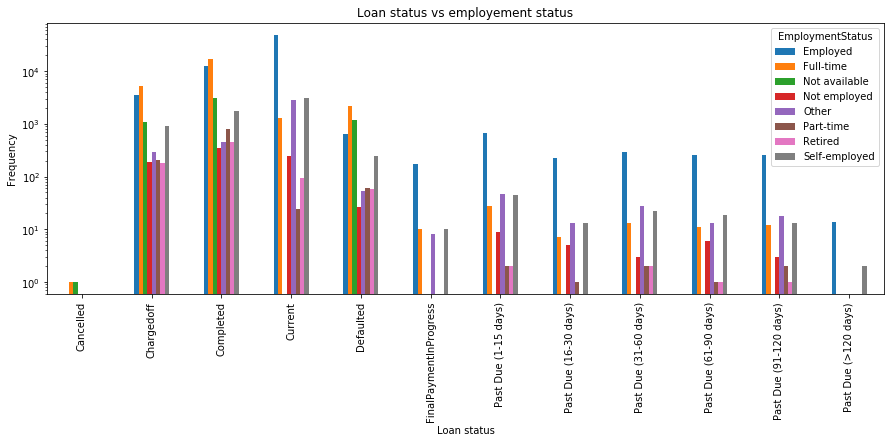

In [27]:
# Plotting a log-scaled plot

df = dataset.groupby(["LoanStatus", "EmploymentStatus"]).size().reset_index(name='Count')
df4 = pd.pivot_table(df,  values='Count',  columns=['EmploymentStatus'],  index = "LoanStatus", aggfunc=np.sum,  fill_value=0)
df4.plot(kind="bar", figsize=(15,5), log=True) 
plt.xlabel('Loan status')
plt.ylabel('Frequency')
plt.title('Loan status vs employement status');

plt.show()


Clearly, employed people qualify to get a loan(they are heavily represented in all employement status groups) but they are also not paying their monthly loan on time. I am also surprised that retired people represent the second big group to get loans from Prosper.

> As written above, the variables I believe to be strongly positively correlated are not. There are some correlation between variables, but negative and moderate. We could see the trend of the borrower rate during the years the data were collected. In order for me to have this trend I had to convert ListingCreationDate into date time and  they create a year feature.


> I did not observe any interesting relationship between the other festures. I assume more in depth analysis need to be made for that purpose.

## Multivariate Exploration

> Here plots of three or more variables to investigate our data will be created.

### 1. ProsperScore & BorrowerRate vs year

We saw a the heatmap plot how ProsperScore and BorrowerRatewhich are correlated in the last section. Now, let us check how the relationship between these variable evolved throughout the years. 

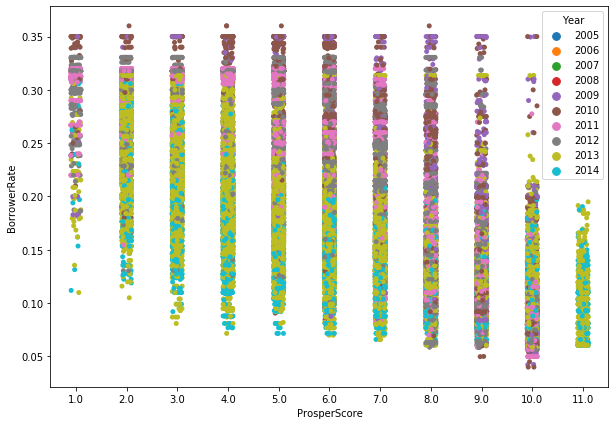

In [28]:
# Plotting a standard-scaled plot

ax = plt.figure(figsize=(10,7))
ax = sb.stripplot(x='ProsperScore' , y='BorrowerRate', hue="Year", data=dataset)  

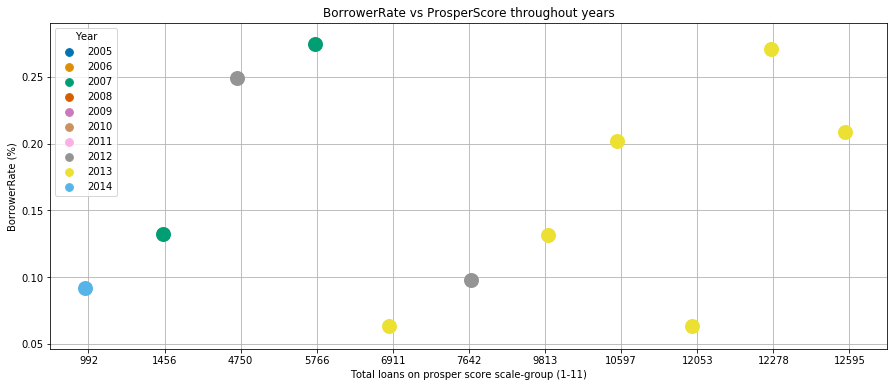

In [29]:
# Using a different plot instead

plt.figure(figsize=(15,6))
gk = dataset['ProsperScore'].value_counts()
ax = sb.stripplot(x=gk, y='BorrowerRate', hue="Year", size= 15, palette="colorblind", jitter=True, data=dataset)  
ax.grid(True)
plt.xlabel('Total loans on prosper score scale-group (1-11)')
plt.ylabel('BorrowerRate (%)')
plt.title('BorrowerRate vs ProsperScore throughout years');

I plotted a second graph because the first one look bad. Looking at both graphs I see that most people got a loan in 2013 and these people had a score between 5 and 10.  The years 2008 up until 2011 were not goed years for Prosper.

### 2. EmploymentStatus & LoanOriginalAmount vs year

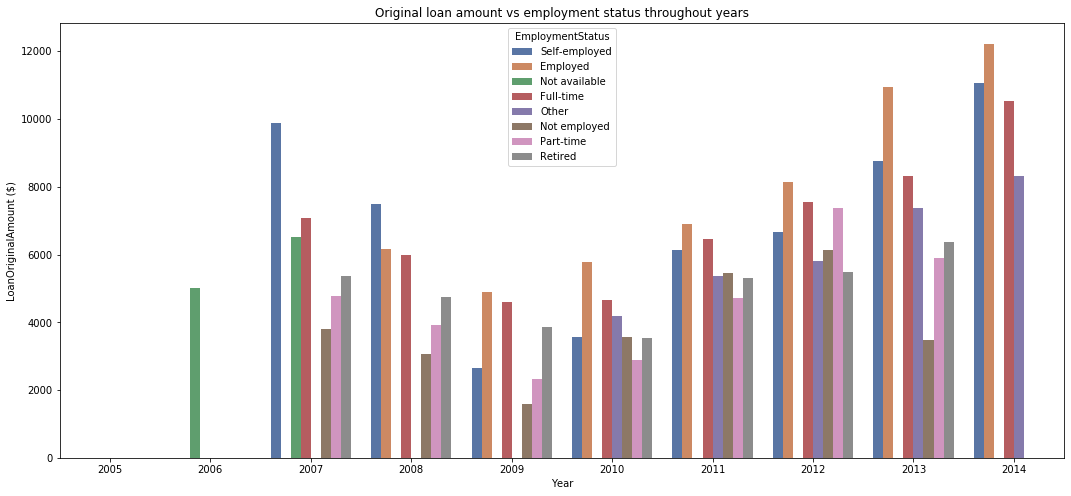

In [30]:
# Plotting a standard-scaled plot

plt.figure(figsize=(18,8))
ax=sb.barplot(x='Year', y='LoanOriginalAmount', hue='EmploymentStatus',  palette="deep", ci= None, data=dataset)
plt.ylabel('LoanOriginalAmount ($)')
plt.xlabel('Year')
plt.title('Original loan amount vs employment status throughout years');

From the graph above, I have noticed that during six years(2009-2014) people who are employed got higher loan amounts followed by full-time workers and self-employed.  It is hard to see which group got lower loans because there is no clear trend for this matter. 

> In the last part of the investigation, visualising was quite interesting. For example: with the graph in setion '1. ProsperScore & BorrowerRate vs year' I wanted to see the relationship between ProsperScore and BorrowerRate and how it is distributed throughtout the years. I ended up also having a clear picture of the amount of loans granted / amount of borrowers related to ProsperScore and BorrowerRate .  



### Reflection

> This exploration task has been very difficult and time consuming. Doing some research about bank lending process helped me to select the variables to focus on.  I have also faced lots of issues with the graphs(no showing data, overlapping data, module not found, package dependency ETC...) that I solved with the help of questions and answers on google and stackoverflow.
To sum up, this visualisation task was for exploration purpose, in order to draw final conclusions more in-depth analyses(descriptive and/or inferential statistics analysis) must be made.

